## Pytorch tutorial

In [4]:
import torch.nn as nn
import torch

integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

one_d_tensor = torch.tensor([1,2,3,4])
print(f"`one_d tensor` is a {one_d_tensor.ndim}-d Tensor: {one_d_tensor}")

two_d_tensor = torch.tensor([[1,2,3,4],[21,22,23,24]])
print(f"`2_d tensor` is a {two_d_tensor.ndim}-d Tensor: {two_d_tensor}")

assert two_d_tensor.ndim == 2

count_to_100 = torch.tensor(range(100))

print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}") 

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732
`one_d tensor` is a 1-d Tensor: tensor([1, 2, 3, 4])
`2_d tensor` is a 2-d Tensor: tensor([[ 1,  2,  3,  4],
        [21, 22, 23, 24]])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [ ]:
#  In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.
# what is a batch_size in a 4d tensor.
# create a 4d tensor Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256. 
# 10 images with channel of 3 and height and width = 256

fourd_array = torch.tensor([[ [[0 for _ in range(256)] for _ in range(256)] for _ in range(3)] for _ in range(10)])

assert fourd_array.shape == (10,3,256,256)


In [33]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")


import numpy as np
# build a tensor of size 2,3
matrix_mult = torch.tensor([[ np.random.normal() for _ in range(3)]for _ in range(2)])
print(matrix_mult.shape)


c1: 76
c2: 76
torch.Size([2, 3])


In [ ]:
input = torch.tensor([[2,3]])
output = torch.tensor([[3.],[4.]])
print(input.shape,output.shape)

result = torch.matmul(matrix_mult.T,output)
print(result.shape)

#TODO: transpose a tensor ?
print(result.T.shape)

torch.Size([1, 2]) torch.Size([2, 1])
torch.Size([3, 1])
torch.Size([1, 3])


## NeuralNetworks in Pytorch

- use torch.nn.Module which serves as a base class for all NN modules in pytorch and thus provides a framework 
- Use a single Module to define our simple NN

In [ ]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(NeuralNetwork,self).__init__()
        self.Weight = nn.Parameter(torch.randn(num_inputs,num_outputs)) # what are these initialization in neural network
        self.bias = nn.Parameter(torch.randn(num_outputs))    
    def forward(self,x):
        z = torch.add(torch.matmul(self.Weight.T,x) ,self.bias) # i don't get how this size has gone to 3x3
        print("output of the z matrix is ",z.shape)
        output = torch.sigmoid(z)
        return output
    
num_inputs= 2
num_outputs=3
neural_net = NeuralNetwork(num_inputs,num_outputs)
x_input =  torch.tensor([[2.],[1.]])
print(f"x_input shape: {x_input.shape}")
print(f"neural_net shape: {neural_net.Weight.shape}")
result = neural_net.forward(x_input)
#result = neural_net(torch.tensor([1,2]))
print(f"output shape: {result.shape}")
print(f"output result: {result}")

x_input shape: torch.Size([2, 1])
neural_net shape: torch.Size([2, 3])
output of the z matrix is  torch.Size([3, 3])
output shape: torch.Size([3, 3])
output result: tensor([[0.9749, 0.9780, 0.9834],
        [0.9169, 0.9267, 0.9438],
        [0.0508, 0.0577, 0.0753]], grad_fn=<SigmoidBackward0>)


## Sequential API
Sequential API we can readily create neural networks by stacking together layers like building blocks from the pytorch and a single nn.Linear to define the network.

- what is the difference between Linear layer sigmoid and the prev layer with nn.Module utilising the matrix multiplication.

In [39]:
class LinearLayerSigmoid(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()
        self.linear=  nn.Linear(num_inputs,num_outputs) #defininig a linear layer
        self.activation= nn.Sigmoid() #defining an activation function
        
    def forward(self,inputs):
        linear=self.linear(inputs)
        outputs=self.activation(linear)
        return outputs
    

num_inputs= 2
num_outputs=3
ll_sigmoid = LinearLayerSigmoid(num_inputs,num_outputs)

x_input = torch.tensor([2.,3.])
output = ll_sigmoid.forward(x_input)
print(f"output shape: {output.shape}")
print(f"output result: {output}")
# how come ll_sigmoid.forward(x_input) and ll_sigmoid(x_input) results in the similar results?


output shape: torch.Size([3])
output result: tensor([0.8819, 0.8642, 0.4771], grad_fn=<SigmoidBackward0>)


In [4]:
import torch
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()
print(y)

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)

tensor(9., grad_fn=<PowBackward0>)
dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


find the min of L = (x-xf)^2

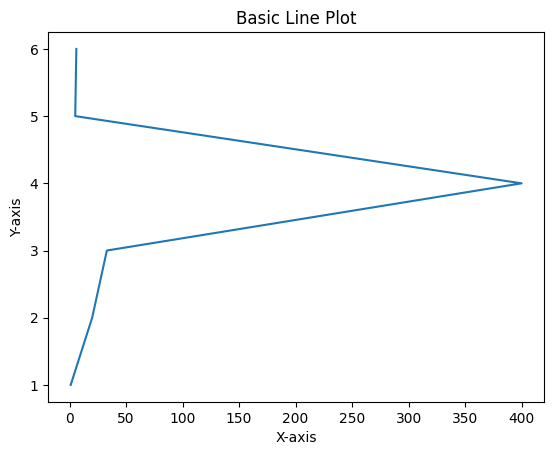

In [ ]:
import matplotlib.pyplot as plt


# how can i write the gradient descent for a func




plt.plot([1,20,33,400,5,6],[1,2,3,4,5,6])
plt.title('Basic Line Plot')  # Adds a title
plt.xlabel('X-axis')  # Adds an X-axis label
plt.ylabel('Y-axis')  # Adds a Y-axis label
plt.show()  # Displays the plot